# Panorama with OpenCV

In [15]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import imutils

image shapes in order: [(1000, 750, 3), (1000, 750, 3), (850, 484, 3), (1000, 750, 3), (1000, 750, 3), (1000, 750, 3), (1000, 750, 3)]
image shapes in order after resize: [(1000, 750, 3), (1000, 750, 3), (1000, 750, 3), (1000, 750, 3), (1000, 750, 3), (1000, 750, 3), (1000, 750, 3)]


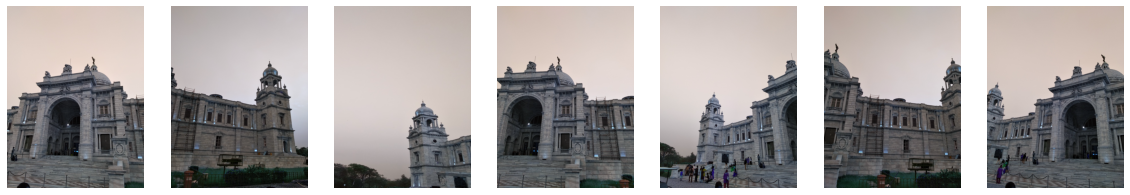

In [13]:
# read input victoria images and show them in a row together
files = glob.glob('/content/images/*.png')
images = [cv2.imread(f) for f in files]

print("image shapes in order:", [img.shape for img in images])
images[2] = cv2.resize(images[2], (750, 1000))
print("image shapes in order after resize:", [img.shape for img in images])

fig = plt.figure(figsize=(20, 7))
rows = 1
columns = 7
for i in range(7):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(images[i])
  plt.axis('off')

In [24]:
# initialize OpenCV's image sticher object and then perform the image stitching on input images
stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
stitched = images[0]
for i in range(1,7):
  (status, stitched) = stitcher.stitch(stitched, images[i])

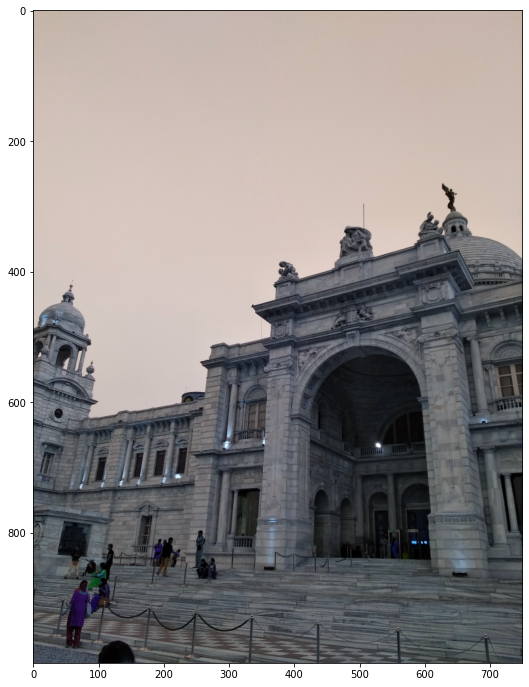

In [27]:
# show victoria panorama
fig = plt.figure(figsize=(15, 12))
plt.imshow(stitched)